In [25]:
import pandas as pd
import glob
import numpy as np

In [26]:
Consolidated_data = pd.DataFrame()
for file_name in glob.glob("US Male/"+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    try:
        participant = x["ParticipantName"].iloc[0]
        x = x.groupby("Time(Sec)").sum().reset_index()
        videoTime = np.arange(0,x['Time(Sec)'].iloc[-1]+3,3)
        x['Time Bin'] = pd.cut(x['Time(Sec)'], videoTime)
        x['Time Bin'] = x['Time Bin'].astype('str').replace('nan',np.nan).fillna(method="bfill").str.split(',').str[1]
        x['Time Bin'] = x['Time Bin'].str.split(']').str[0]
        x['%Time'] = round(x["Time(Sec)"]*100/max(x["Time(Sec)"]))
        x["ParticipantName"] = participant
        Consolidated_data = pd.concat([Consolidated_data,x],axis=0)
    except:
        pass

In [27]:
Consolidated_data["Time Bin"] = Consolidated_data["Time Bin"].astype("float").astype("int64")

In [35]:
Consolidated_data

,Time(Sec),ParticipantName,Time Bin,%Time,Brand,Impression
0,0,Participant 17,9,0.0,Wahl,0.0
1,7,Participant 17,9,2.0,Wahl,0.0
2,9,Participant 17,9,2.0,Wahl,0.0
3,10,Participant 17,12,3.0,Wahl,0.0
4,11,Participant 17,12,3.0,Wahl,1.0
...,...,...,...,...,...,...
56489,731,Participant 32,732,97.0,Philips,0.0
56490,732,Participant 32,732,98.0,Philips,0.0
56491,735,Participant 32,735,98.0,Philips,0.0
56492,741,Participant 32,741,99.0,Philips,0.0


In [29]:
columns = ['Time(Sec)','ParticipantName','Time Bin','%Time']
Brands = list(set(Consolidated_data.columns) - set(columns))

In [31]:
Consolidated_data = Consolidated_data.melt(id_vars=['Time(Sec)','ParticipantName','Time Bin','%Time'], value_vars=Brands)

In [33]:
Consolidated_data = Consolidated_data.rename(columns={"variable":"Brand","value":"Impression"}).dropna()

In [34]:
Consolidated_data.to_csv("VideoAnalysis_US Male.csv",index=False)

<AxesSubplot:ylabel='Brand'>

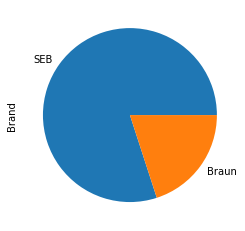

In [9]:
Consolidated_data[(Consolidated_data["Time Bin"] == 12) & (Consolidated_data["Impression"] >= 1.0)]["Brand"].value_counts(normalize=True).plot(kind='pie',)

In [47]:
Consolidated_data[(Consolidated_data["Impression"] >= 1.0)]["Brand"].value_counts(normalize=True)*100

SEB             26.337650
Braun           21.952113
Philips         14.219399
Silk'n           6.792084
Wahl             6.340093
Gillette         5.741510
Norelco          5.521622
Remington        4.287808
Panasonic        4.019057
Conair           3.115075
Ya-man           0.952846
Ke-non           0.525287
Idea Village     0.183240
Datsumo          0.012216
Name: Brand, dtype: float64

In [10]:
round(x["Time(Sec)"]*100/max(x["Time(Sec)"]))

0      0.0
1    100.0
Name: Time(Sec), dtype: float64

In [56]:
df_us_male = pd.read_csv("VideoAnalysis_US Male.csv")
df_us_female = pd.read_csv("VideoAnalysis_US Female.csv")

In [57]:
df_us_male["Gender"] = "Male"
df_us_female["Gender"] = "Female"
df_us_male["Country"] = "US"
df_us_female["Country"] = "US"
df_us_male["Survey"] = "Old"
df_us_female["Survey"] = "New"

In [42]:
pd.concat([df_us_female,df_us_male]).reset_index(drop=True).to_csv("Bruan videoAnalysis.csv",index=False)

In [58]:
Consolidated_data = pd.concat([df_us_female,df_us_male]).reset_index(drop=True)

In [60]:
Consolidated_data

,Time(Sec),ParticipantName,Time Bin,%Time,Brand,Impression,Gender,Country,Survey
0,0,Participant 126,3,0.0,Braun,0.0,Female,US,New
1,1,Participant 126,3,1.0,Braun,0.0,Female,US,New
2,2,Participant 126,3,3.0,Braun,0.0,Female,US,New
3,3,Participant 126,3,4.0,Braun,0.0,Female,US,New
4,4,Participant 126,6,6.0,Braun,0.0,Female,US,New
...,...,...,...,...,...,...,...,...,...
71370,731,Participant 32,732,97.0,Philips,0.0,Male,US,Old
71371,732,Participant 32,732,98.0,Philips,0.0,Male,US,Old
71372,735,Participant 32,735,98.0,Philips,0.0,Male,US,Old
71373,741,Participant 32,741,99.0,Philips,0.0,Male,US,Old


In [61]:
Consolidated_data["FullName"] = Consolidated_data['ParticipantName'].map(str) + '_' + Consolidated_data['Gender'].map(str) + '_' + Consolidated_data['Country'].map(str) + '_' + Consolidated_data['Survey'].map(str)

In [62]:
Consolidated_data.to_csv("Bruan videoAnalysis_v1.0.csv",index=False)

In [51]:
Consolidated_data[Consolidated_data["Brand"] != "SEB"][(Consolidated_data["Impression"] >= 1.0)]["Brand"].value_counts(normalize=True)*100

<ipython-input-51-0ed167a328a8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Consolidated_data[Consolidated_data["Brand"] != "SEB"][(Consolidated_data["Impression"] >= 1.0)]["Brand"].value_counts(normalize=True)*100


Braun           29.800995
Philips         19.303483
Silk'n           9.220564
Wahl             8.606965
Gillette         7.794362
Norelco          7.495854
Remington        5.820896
Panasonic        5.456053
Conair           4.228856
Ya-man           1.293532
Ke-non           0.713101
Idea Village     0.248756
Datsumo          0.016584
Name: Brand, dtype: float64